### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [17]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [18]:
# Explore the data.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [20]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [56]:
# Drop unnecessary columns.
reviews1 = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews1.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [62]:
# Rename the column headers.
reviewsf = reviews1.rename(columns={'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score'})

# View column names.
reviewsf.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [4]:
# Create a CSV file as output.
reviewsf.to_csv('Turtle_reviews_finale.csv', index=False)

NameError: name 'reviewsf' is not defined

In [5]:
# Import new CSV file with Pandas.
reviews_finale = pd.read_csv('Turtle_reviews_finale.csv')

# View DataFrame.
reviews_finale.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [6]:
# Independent variable.
x = reviews_finale['spending_score']

# Dependent variable.
y = reviews_finale['loyalty_points']

# OLS model and summary.
reviews_finale1 = ols('y ~ x', data = reviews_finale).fit()

# Print the regression table.
reviews_finale1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          2.92e-263
Time:                        22:02:50   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Extract the estimated parameters.
print('Parameters: ', reviews_finale1.params)

# Extract the standard errors.
print('Standard errors: ', reviews_finale1.bse)

# Extract the predicted values.
print('Predicted values: ', reviews_finale1.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [70]:
# Set the X coefficient and the constant to generate the regression table.
loyalty_pred = -75.052663 + 33.061693*reviews_finale['spending_score']

# View the output.
loyalty_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

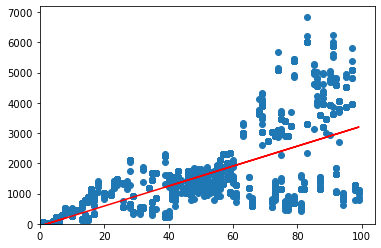

In [71]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in red).
plt.plot(x, loyalty_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [8]:
# Independent variable.
x = reviews_finale['remuneration']

# Dependent variable.
y = reviews_finale['loyalty_points']

# OLS model and summary.
reviews_finale2 = ols('y ~ x', data = reviews_finale).fit()

In [9]:
# Extract the estimated parameters.
print('parameters: ', reviews_finale2.params)

# Extract the standard errors.
print('Standard errors: ', reviews_finale2.bse)

# Extract the predicted values.
print('predicted values: ', reviews_finale2.predict())

parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [10]:
# Set the the X coefficient and the constant to generate the regression table.
loyalty_pred1 = -65.686513 + 34.187825*reviews_finale['remuneration']

# View the output.
loyalty_pred1

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

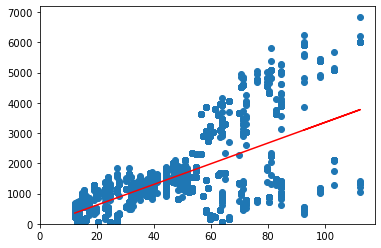

In [12]:
# Plot graph with regression line.
plt.scatter(x, y)

# Plot the regression line (in red).
plt.plot(x, loyalty_pred1, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [16]:
# Independent variable.
x = reviews_finale['age']

# Dependent variable.
y = reviews_finale['loyalty_points']

# OLS model and summary.
reviews_finale3 = ols('y ~ x', data = reviews_finale).fit()

In [17]:
# Extract the estimated parameters.
print('Parameters: ', reviews_finale3.params)

# Extract the standard errors.
print('Standard errors: ', reviews_finale3.bse)

# Extract the predicted values.
print('Predicted values: ', reviews_finale3.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
loyalty_pred2 = 1736.517739 + -4.012805*reviews_finale['remuneration']

# View the output.
loyalty_pred2

0       1687.160237
1       1687.160237
2       1683.869737
3       1683.869737
4       1680.579237
           ...     
1995    1397.596229
1996    1364.691228
1997    1364.691228
1998    1341.657727
1999    1364.691228
Name: remuneration, Length: 2000, dtype: float64

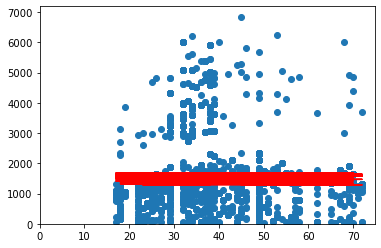

In [21]:
# Plot graph with regression line.
plt.scatter(x, y)

# Plot the regression line (in red).
plt.plot(x, loyalty_pred2, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('Turtle_reviews_finale.csv')

# View DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [29]:
# Drop unnecessary columns.
df3 = df2.drop(columns=['gender', 'age', 'education', 'loyalty_points', 'product', 'review', 'summary'])

# View DataFrame.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [30]:
# Explore the data.
df3.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [31]:
# Descriptive statistics.
df3.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

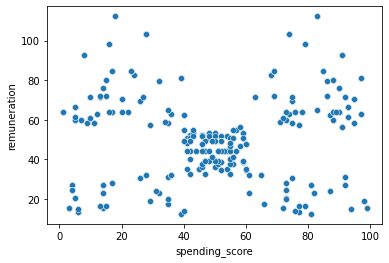

In [47]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score',
                y='remuneration',
                data=df3)

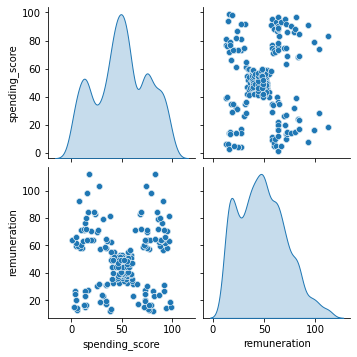

In [48]:
# Create a pairplot with Seaborn
x = df3[['spending_score', 'remuneration']]

sns.pairplot(df3,
             vars=x,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

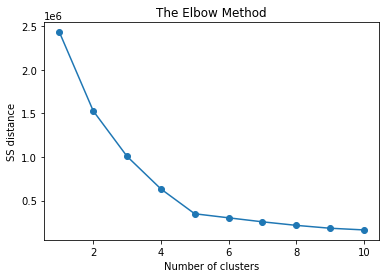

In [49]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

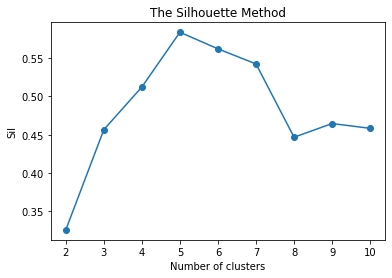

In [50]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

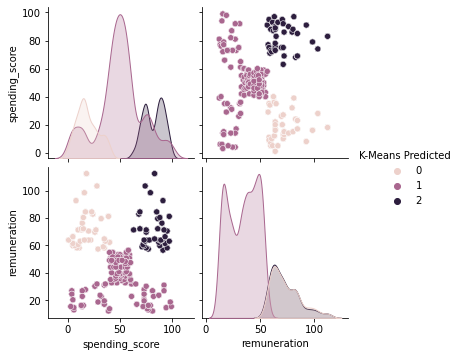

In [51]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

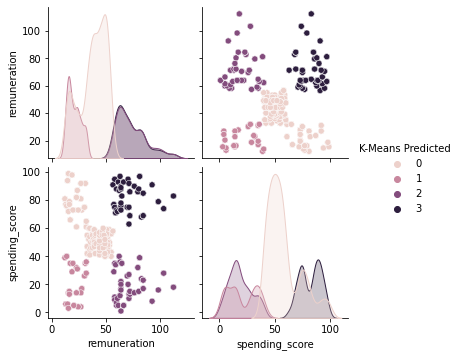

In [41]:
# Use three clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

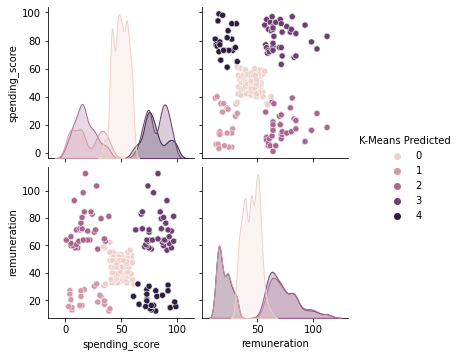

In [53]:
# Use three clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

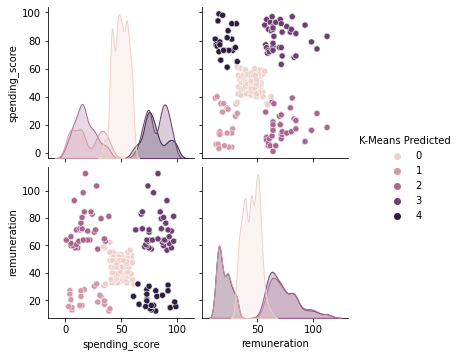

In [54]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [55]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

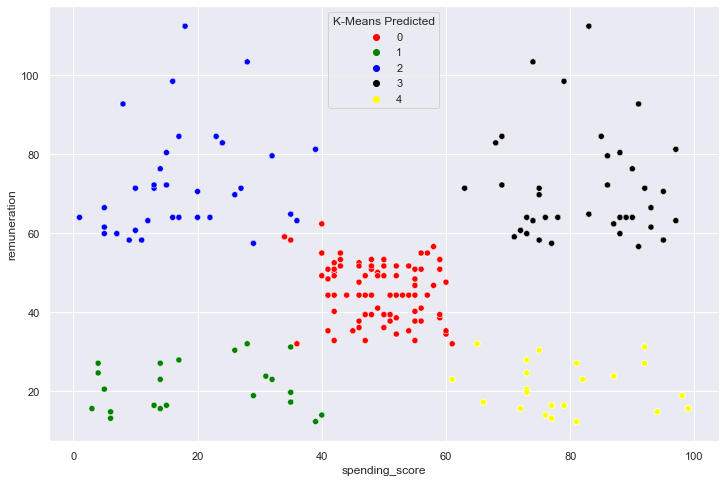

In [56]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'yellow'])
# View the DataFrame.


In [49]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***


Dterminine the optimal number of clusters:
Looking at the elbow method, we could see that the plot suggests that the elbow is formed with values of k between 3 and 5. the curve started to flatten up after 5;
Looking at the silhouette method, the highest point on the curve appears to be 5, therefore the optimum number of clusters is 5.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [39]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gadir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gadir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Load the data set as df3.
df3 = pd.read_csv('Turtle_reviews_finale.csv')

# View DataFrame.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [9]:
# Explore data set.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [11]:
# Keep necessary columns. Drop unnecessary columns.
df_reviewed = df3.drop(columns=['gender', 'age', 'education', 'loyalty_points', 'product', 'remuneration', 'spending_score'])

# View DataFrame.
df_reviewed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [12]:
# Determine if there are any missing values.
df_reviewed.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [15]:
# Review: Change all to lower case and join with a space.
df_reviewed['review'] = df_reviewed['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df_reviewed['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [16]:
# Summary: Change all to lower case and join with a space.
df_reviewed['summary'] = df_reviewed['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df_reviewed['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [17]:
# Replace all the punctuations in review column.
df_reviewed['review'] = df_reviewed['review'].str.replace('[^\w\s]','')

# View output.
df_reviewed['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [18]:
# Replace all the puncuations in summary column.
df_reviewed['summary'] = df_reviewed['summary'].str.replace('[^\w\s]','')

# View output.
df_reviewed['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [20]:
# Drop duplicates in both columns.
df_reviewed = df_reviewed.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.
df_reviewed.reset_index(inplace=True)
df_reviewed

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [30]:
# Create new DataFrame (copy DataFrame).
df_copy = df_reviewed.copy()

# View DataFrame.
df_copy

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


In [106]:
# Apply tokenisation to both columns.
df_copy['reviewTokenized'] = df_copy['review'].apply(word_tokenize)
df_copy['summaryTokenized'] = df_copy['summary'].apply(word_tokenize)

# View DataFrame.
df_copy['reviewTokenized']
df_copy['summaryTokenized']

0       [the, fact, that, 50, of, this, space, is, was...
1       [another, worthless, dungeon, masters, screen,...
2                    [pretty, but, also, pretty, useless]
3                                           [five, stars]
4                                           [money, trap]
                              ...                        
1956    [the, perfect, word, game, for, mixed, ages, w...
1957                                         [super, fun]
1958                                        [great, game]
1959                                        [four, stars]
1960                                   [love, this, game]
Name: summaryTokenized, Length: 1961, dtype: object

In [112]:
# String all the reviews together in a single variable.
# Create an empty string variable.
all_reviews = ''

for i in range(df_copy.shape[0]):
    # Add each token to the list.
    all_reviews = all_reviews + df_copy['review'][i]

In [113]:
# import seaborn
import seaborn as sns
# Set the colour palette.
sns.set(color_codes=True)

# Review: Create a word cloud.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                min_font_size = 10).generate(all_reviews)

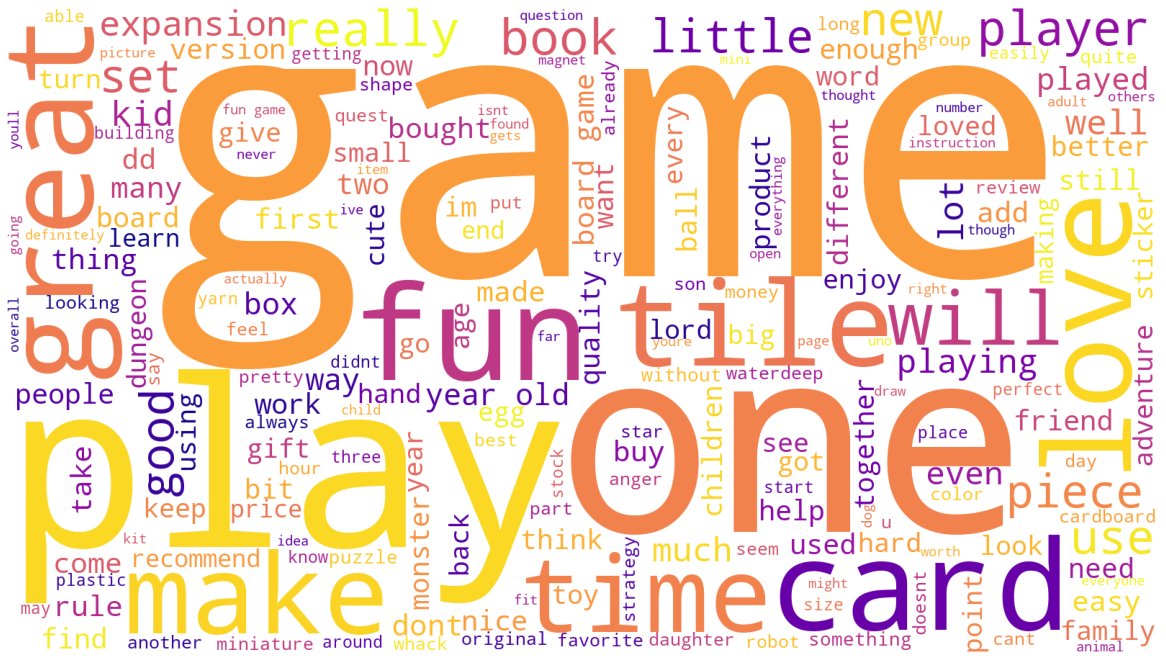

In [98]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [99]:
# String all the summaries together in a single variable.
# Create an empty string variable.
all_summaries = ''
for i in range(df_copy.shape[0]):
    # Add each comment.
    all_summaries = all_summaries + df_copy['summary'][i]

In [100]:
# Summary: Create a word cloud.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                min_font_size = 10).generate(all_summaries)

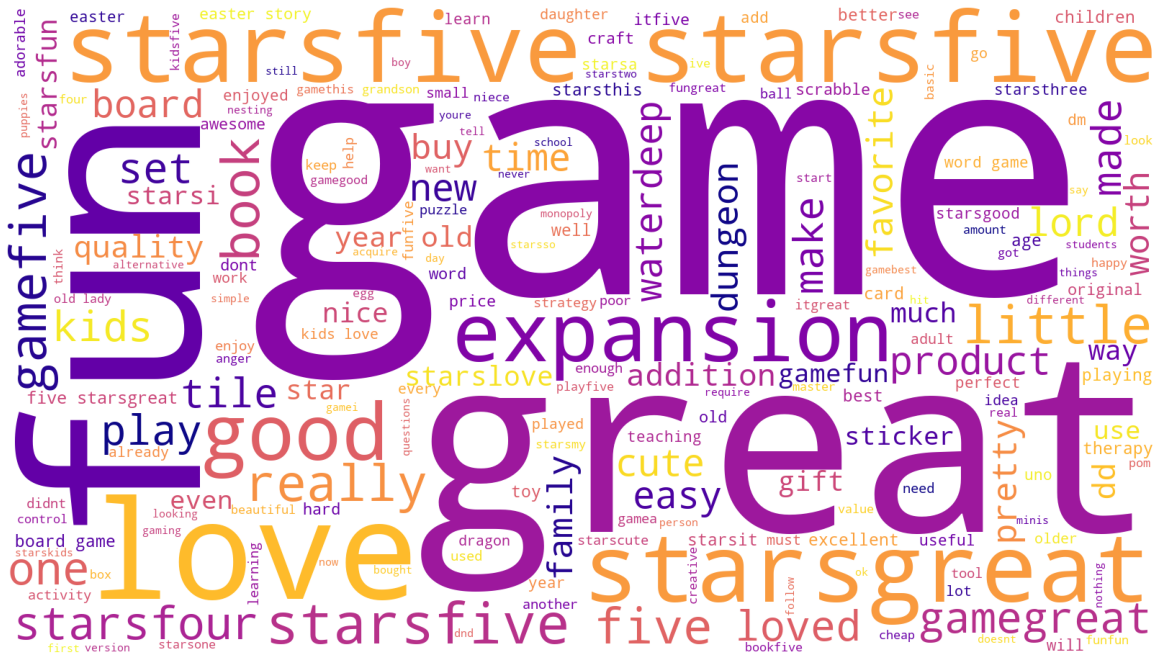

In [101]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [116]:
# Review: Determine the frequency distribution.
# Define an empty list of tokens.
review_tokens = []

for i in range(df_copy.shape[0]):
    # Add each token to the list.
    review_tokens = review_tokens + df_copy['reviewTokenized'][i]
    
# Calculate the frequency distribution.
fdist_review = FreqDist(review_tokens)

# Preview data.
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [135]:
# Review: Determine the frequency distribution.
# Define an empty list of tokens.
summary_tokens = []

for i in range(df_copy.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + df_copy['summaryTokenized'][i]
    
# Calculate the frequency distribution.
fdist_summary = FreqDist(summary_tokens)

# Preview data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [118]:
# Review: Delete all the alpanum.
all_reviews1 = [word for word in review_tokens if word.isalnum()]

In [136]:
# Summary: Delete all the alpanum.
all_summaries1 = [word for word in summary_tokens if word.isalnum()]

In [121]:
# Remove all the stopwords in review column
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review2 = [x for x in all_reviews1 if x.lower() not in english_stopwords]

# Define an empty string variable.
review2_string = ''

for value in all_reviews1:
    # Add each filtered token word to the string.
    review2_string = review2_string + value + ' '

In [133]:
# Remove all the stopwords in summary column
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
Summary2 = [x for x in all_summaries1 if x.lower() not in english_stopwords]

# Define an empty string variable.
Summary2_string = ''

for value in all_summaries1:
    # Add each filtered token word to the string.
    Summary2_string = Summary2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [124]:
# Review: Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma',
                stopwords='None', 
                min_font_size = 10).generate(review2_string)

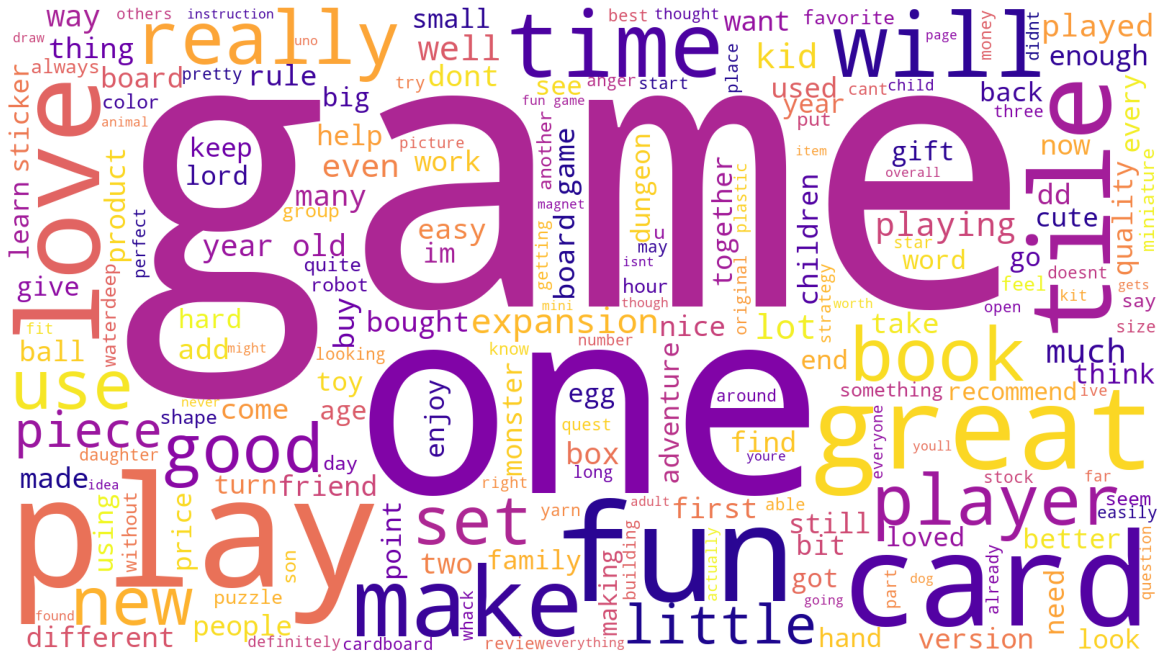

In [125]:
# Review: Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [126]:
# Summary: Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma',
                stopwords='None',
                min_font_size = 10).generate(Summary2_string)

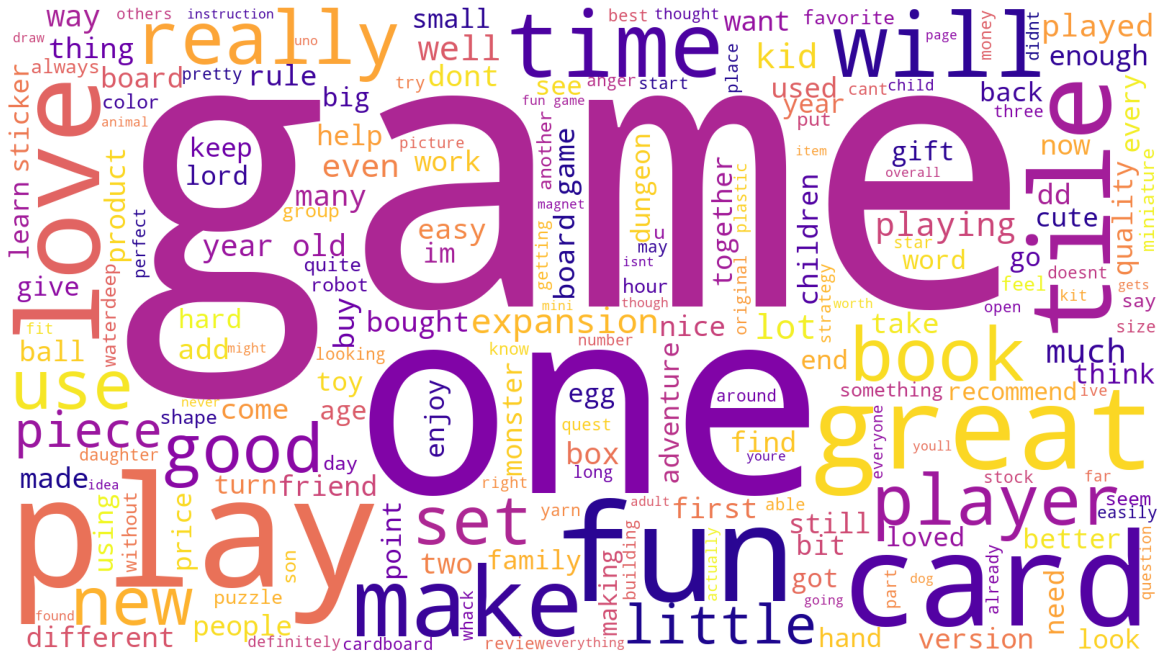

In [127]:
# Summary: Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [129]:
# Review: Determine the 15 most common words.
# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(review2).most_common(15),
                      columns=['word', 'Frequency']).set_index('word')

# Preview data.
review_counts

,Frequency
word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


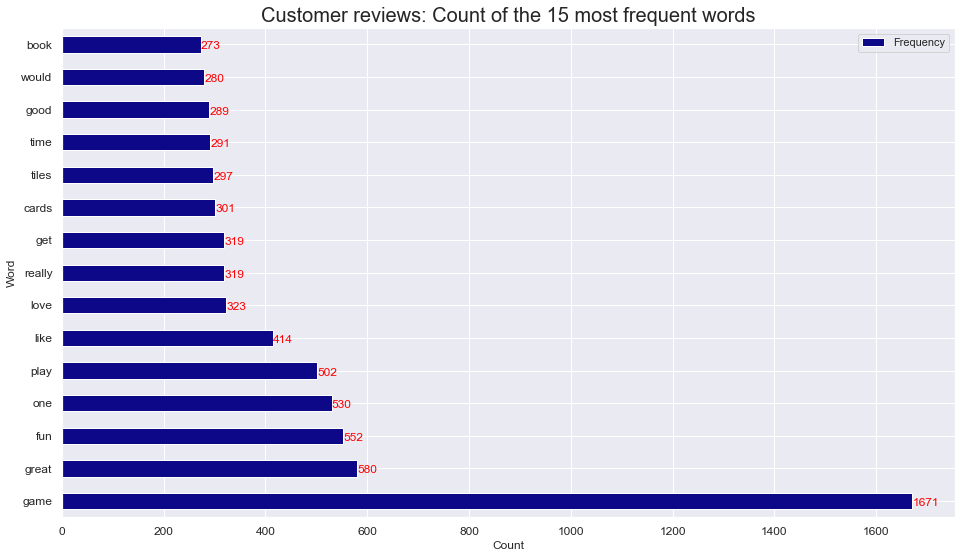

In [148]:
# Review: Visualise the resulting frequency distribution
# Set the plot type.
ax = review_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [137]:
# Summary: Determine the 15 most common words.
# Generate a DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(Summary2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summary_counts

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


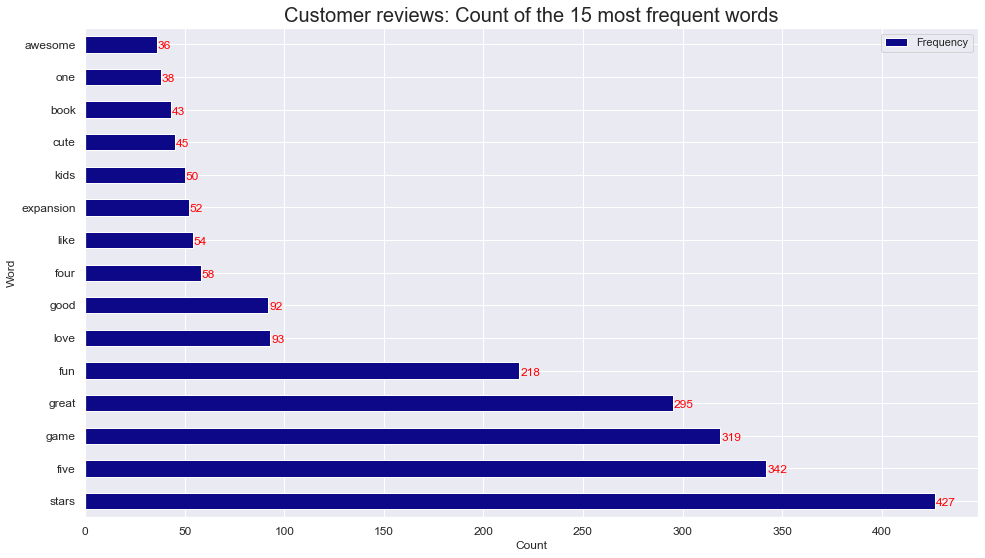

In [149]:
# Review: Visualise the resulting frequency distribution
# Set the plot type.
ax = summary_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [140]:
# Review: Determine polarity of review column. 
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df_copy['review_polarity'] = df_copy['review'].apply(generate_polarity)

# View output.
df_copy['review_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

In [150]:
# Review: Determine subjectivity of review column. 
# Define a function to extract a subjectivity score for the reviews.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df_copy['review_subjectity'] = df_copy['review'].apply(generate_subjectivity)

# Preview the result.
df_copy['review_subjectity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: review_subjectity, dtype: float64

In [141]:
# Summary: Determine polarity of summary column. 
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df_copy['summary_polarity'] = df_copy['summary'].apply(generate_polarity)

# View output.
df_copy['summary_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

In [151]:
# Summary: Determine subjectivity of summary column. 
# Define a function to extract a subjectivity score for the reviews.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df_copy['summary_subjectity'] = df_copy['summary'].apply(generate_subjectivity)

# Preview the result.
df_copy['summary_subjectity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectity, dtype: float64

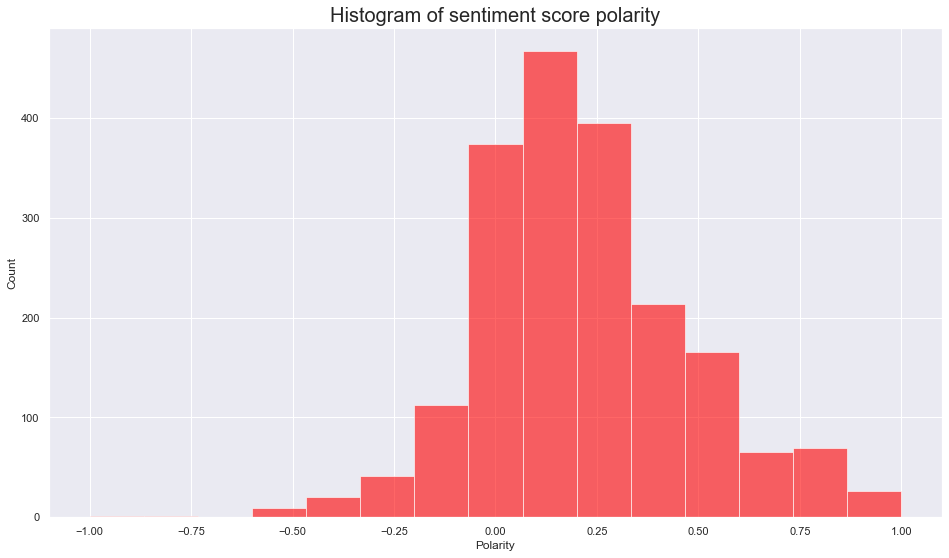

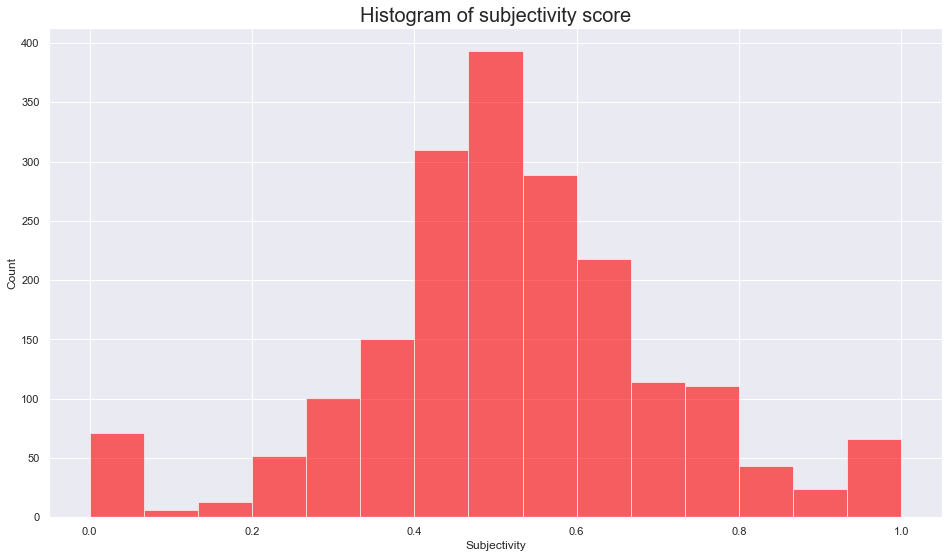

In [153]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_copy['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

## ........................................................#####

# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_copy['review_subjectity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score', fontsize=20)

plt.show()

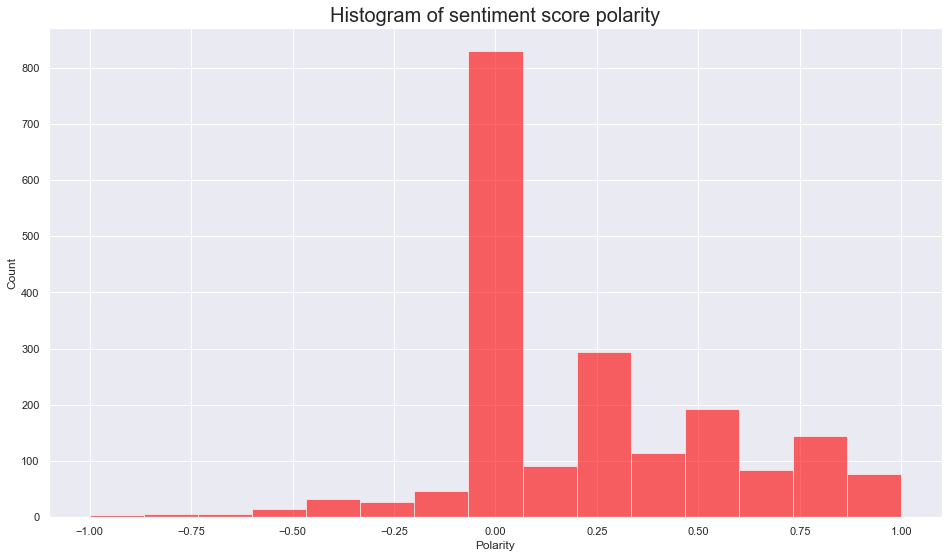

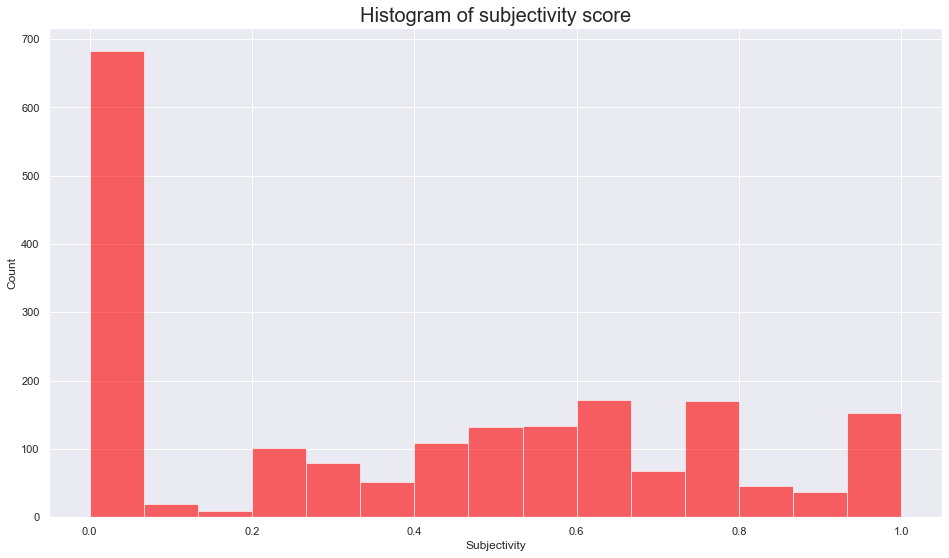

In [154]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_copy['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

## ........................................................#####

# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_copy['summary_subjectity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [162]:
# Top 20 negative reviews.
# Create a DataFrame.
Top20_neg_review = df_copy.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
Top20_neg_review = Top20_neg_review[['review', 'review_polarity', 'review_subjectity']]

# Adjust the column width.
Top20_neg_review.style.set_properties(subset=['review'], **{'width': '1000px'})

# View output.


,review,review_polarity,review_subjectity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
181,incomplete kit very disappointing,-0.780000,0.910000
1773,im sorry i just find this product to be boring and to be frank juvenile,-0.583333,0.750000
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000,0.300000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000,0.900000
226,this was a gift for my daughter i found it difficult to use,-0.500000,1.000000
229,i found the directions difficult,-0.500000,1.000000
289,instructions are complicated to follow,-0.500000,1.000000
300,difficult,-0.500000,1.000000
1501,expensive for what you get,-0.500000,0.700000


In [163]:
# Top 20 negative summaries.
# Create a DataFrame.
Top20_neg_review = df_copy.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
Top20_neg_review = Top20_neg_review[['summary', 'summary_polarity', 'summary_subjectity']]

# Adjust the column width.
Top20_neg_review.style.set_properties(subset=['summary'], **{'width': '500px'})

# View output.


,summary,summary_polarity,summary_subjectity
21,the worst value ive ever seen,-1.000000,1.000000
207,boring unless you are a craft person which i am,-1.000000,1.000000
819,boring,-1.000000,1.000000
1148,before this i hated running any rpg campaign dealing with towns because it,-0.900000,0.700000
1,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
143,disappointed,-0.750000,0.750000
623,disappointed,-0.750000,0.750000
785,disappointed,-0.750000,0.750000
1591,disappointed,-0.750000,0.750000
361,promotes anger instead of teaching calming methods,-0.700000,0.200000


In [164]:
# Top 20 positive reviews.
# Create a DataFrame.
Top20_neg_review = df_copy.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns.
Top20_neg_review = Top20_neg_review[['summary', 'summary_polarity', 'summary_subjectity']]

# Adjust the column width.
Top20_neg_review.style.set_properties(subset=['summary'], **{'width': '500px'})

# View output.


,summary,summary_polarity,summary_subjectity
6,best gm screen ever,1.000000,0.300000
28,wonderful designs,1.000000,1.000000
32,perfect,1.000000,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000,1.000000
133,perfect for preschooler,1.000000,1.000000
139,awesome sticker activity for the price,1.000000,1.000000
160,awesome book,1.000000,1.000000
162,he was very happy with his gift,1.000000,1.000000
186,awesome,1.000000,1.000000
209,awesome and welldesigned for 9 year olds,1.000000,1.000000


In [165]:
# Top 20 positive summaries.
# Create a DataFrame.
Top20_neg_review = df_copy.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
Top20_neg_review = Top20_neg_review[['review', 'review_polarity', 'review_subjectity']]

# Adjust the column width.
Top20_neg_review.style.set_properties(subset=['review'], **{'width': '500px'})

# View output.


,review,review_polarity,review_subjectity
7,came in perfect condition,1.000000,1.000000
164,awesome book,1.000000,1.000000
193,awesome gift,1.000000,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000,1.000000
517,perfect just what i ordered,1.000000,1.000000
583,wonderful product,1.000000,1.000000
601,delightful product,1.000000,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000,1.000000
782,perfect,1.000000,1.000000
923,awesome,1.000000,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

# 